In [1]:
import pandas as pd
import numpy as np
import lifelines as ll
import sksurv as sks
import matplotlib.pyplot as plt
from bart_survival import surv_bart as sb


import lifelines as ll
from lifelines import KaplanMeierFitter
import subprocess
import threading as th
import multiprocessing as mp
import sys
sys.path.append("../src/")
sys.path.append("../py/")
import _functions1 as fn
import _conditions2 as cn
import _plot_fx as pltf
import _param2 as prm
import sim_adj as sm
# import brt_adj as sb


WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
import importlib
# importlib.reload(fn)
# importlib.reload(cn)
# importlib.reload(sb)

In [31]:
# cl = []
# cl2 = []
# for i in range(1):
# 	# cens, cens2, qnt_t = fn.sim_3s(
#     # qnt_t25, qnt_t75 = fn.sim_3s(
# 	qnt_t, event_dict, sv_true, x_mat = fn.sim_3s(
# 		seed= i + 200,
# 		n = 400,
# 		scenario = cn.complex_1,
# 		SPLIT_RULES = prm.SPLIT_RULES1,
# 		model_dict = prm.MODEL_DICT1,
# 		sampler_dict = prm.SAMPLER_DICT1 
# 	)
	# cl.append(cens)
	# cl2.append(cens2)


In [3]:
import importlib
importlib.reload(fn)

<module '_functions1' from '/Users/jacobtiegs/projects/bart_paper/bart_survival_paper/notebook/../py/_functions1.py'>

In [32]:
x_mat, event_dict, sv_true = fn.sim_3s(
	seed= 200,
	n = 400,
	scenario = cn.complex_2,
	SPLIT_RULES = prm.SPLIT_RULES1,
	model_dict = prm.MODEL_DICT1,
	sampler_dict = prm.SAMPLER_DICT1 
)


mean shape 1.3175
mean scale 58.475
542.0
mean time draws 60.08423897989122
cens mean 243.865


In [51]:
cens_perc, cens_perc2, qnt_t, ev_d = fn.sim_3s(
	seed= 200,
	n = 400,
	scenario = cn.complex_2,
	SPLIT_RULES = prm.SPLIT_RULES1,
	model_dict = prm.MODEL_DICT1,
	sampler_dict = prm.SAMPLER_DICT1 
)


mean shape 1.3175
mean scale 58.475
542.0
mean time draws 60.08423897989122
cens mean 243.865


In [162]:
importlib.reload(fn)
importlib.reload(prm)
importlib.reload(sb)

<module 'bart_survival.surv_bart' from '/opt/miniconda3/envs/p_env2v/lib/python3.11/site-packages/bart_survival/surv_bart.py'>

In [163]:
meta, sv_true, cph_sv, pb_sv, r_sv= fn.sim_3s(
	seed= 5204,
	n = 400,
	scenario_ = cn.complex_1,
	SPLIT_RULES = prm.SPLIT_RULES1,
	model_dict = prm.MODEL_DICT1,
	sampler_dict = prm.SAMPLER_DICT1 
)

mean shape 2.0
mean scale 49.77852671490301
229.0
mean time draws 43.64255573194558
good sim


Only 10 samples in chain.
Multiprocess sampling (4 chains in 4 jobs)
PGBART: [f]
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
Sampling 4 chains for 10 tune and 10 draw iterations (40 + 40 draws total) took 17 seconds.
Sampling: [f]


Loading required package: nlme
Loading required package: nnet
Loading required package: survival


[1] "/Users/jacobtiegs/projects/bart_paper/bart_survival_paper/notebook"
*****Calling gbart: type=2
*****Data:
data:n,p,np: 1765, 10, 2800
y1,yn: 0.000000, 1.000000
x1,x[n*p]: 8.000000, 0.000000
xp1,xp[np*p]: 8.000000, 0.000000
*****Number of Trees: 50
*****Number of Cut Points: 6 ... 1
*****burn,nd,thin: 250,1670,10
*****Prior:beta,alpha,tau,nu,lambda,offset: 2,0.95,0.212132,3,1,-0.761332
*****Dirichlet:sparse,theta,omega,a,b,rho,augment: 0,0,1,0.5,1,10,0
*****printevery: 100

MCMC
done 0 (out of 1920)
done 100 (out of 1920)
done 200 (out of 1920)
done 300 (out of 1920)
done 400 (out of 1920)
done 500 (out of 1920)
done 600 (out of 1920)
done 700 (out of 1920)
done 800 (out of 1920)
done 900 (out of 1920)
done 1000 (out of 1920)
done 1100 (out of 1920)
done 1200 (out of 1920)
done 1300 (out of 1920)
done 1400 (out of 1920)
done 1500 (out of 1920)
done 1600 (out of 1920)
done 1700 (out of 1920)
done 1800 (out of 1920)
done 1900 (out of 1920)
time: 10s
trcnt,tecnt: 167,167


In [135]:
sv_t_0 = sv_true["sv_true"][:,meta["qnt_t"][1]]
sv_t_0.shape
cph_sv.shape
pb_sv.shape
r_sv.shape
# print(meta["qnt_t"])
# meta["uniq_t"]


(400, 7)

In [117]:
importlib.reload(pltf)

<module '_plot_fx' from '/Users/jacobtiegs/projects/bart_paper/bart_survival_paper/notebook/../py/_plot_fx.py'>

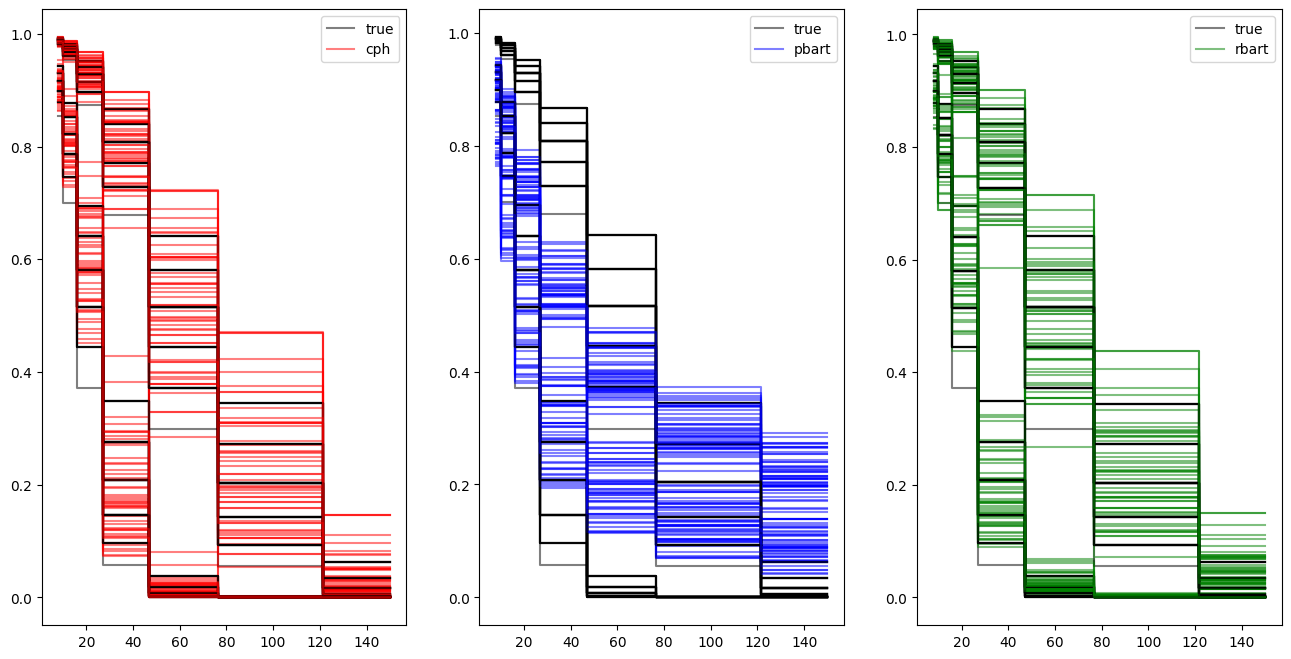

In [164]:
sv_t_0 = sv_true["sv_true"][:,meta["qnt_t"][1]]
sv_t_0

plotss = pltf.plots3(meta["qnt_t"][0],sv_t_0, cph_sv, pb_sv, r_sv)

In [28]:
cph_sv.shape
cph_sv2.shape

# print(pb_sv[1])
# qnt_t
cph_sv.shape

meta["true_t"][meta["qnt_t"][1]] == meta["qnt_t"][0]

array([ True,  True,  True,  True,  True,  True,  True])

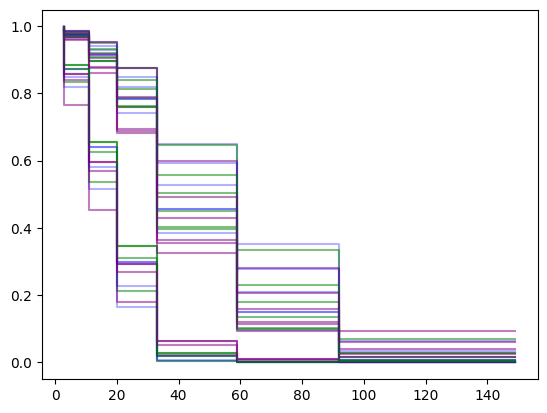

In [40]:
pb_mn = pb_sv[0]["sv"].mean(0)
r_svm = r_sv[0]
for i in range(10):
	plt.step(qnt_t, sv_true["sv_true"][i, meta["qnt_t"][1]],color = "blue", alpha=0.3)
	plt.step(qnt_t, cph_sv[i,:], color = "green", alpha=0.5)
	
	# plt.step(qnt_t, pb_mn[i,:], color = "purple", alpha=0.5)
	# plt.step(qnt_t, r_svm[i,:], color = "pink", alpha=0.5)

In [53]:
# pb_sv[0]["sv"].mean(0).shape
r_sv[0].shape

(400, 7)

In [78]:
s_l = []
c_l = []
p_l = []
r_l = []
sv_t_0 = sv_true["sv_true"][:,meta["qnt_t"][1]]
cph_sv_0 = cph_sv
pb_sv_0 = pb_sv[0]["sv"].mean(0)
r_sv_0 = r_sv[0]

# sv_true

In [81]:
s_l.append(sv_t_0)
c_l.append(cph_sv_0)
p_l.append(pb_sv_0)
r_l.append(r_sv_0)

In [82]:
r_l

[array([[9.98787841e-01, 9.81957404e-01, 9.21210271e-01, ...,
         4.17299891e-01, 1.38544689e-01, 2.25137106e-02],
        [9.99629276e-01, 9.92874522e-01, 9.66075274e-01, ...,
         6.42194399e-01, 3.14613816e-01, 8.52241532e-02],
        [9.97628548e-01, 9.70484760e-01, 8.84905312e-01, ...,
         3.84672736e-01, 1.22892767e-01, 1.81766282e-02],
        ...,
        [9.64091149e-01, 7.67765265e-01, 4.43852779e-01, ...,
         1.68406274e-02, 8.83681159e-04, 2.27622844e-05],
        [9.99110167e-01, 9.88089580e-01, 9.44708514e-01, ...,
         5.13109102e-01, 2.07124087e-01, 4.35432769e-02],
        [9.88833956e-01, 9.05567383e-01, 7.05367059e-01, ...,
         9.40451762e-02, 1.08962171e-02, 6.71276500e-04]]),
 array([[9.98787841e-01, 9.81957404e-01, 9.21210271e-01, ...,
         4.17299891e-01, 1.38544689e-01, 2.25137106e-02],
        [9.99629276e-01, 9.92874522e-01, 9.66075274e-01, ...,
         6.42194399e-01, 3.14613816e-01, 8.52241532e-02],
        [9.97628548e-01, 

In [92]:
# fn.apply_metrics3(sv_t_0, cph_sv_0)
# fn.apply_metrics3(sv_t_0, pb_sv_0)
r_met = fn.apply_metrics3(s_l, r_l)
r_met

{'rmse': array([[0.00987211, 0.02240847, 0.03746119, 0.03903898, 0.04732988,
         0.03190179, 0.01860136],
        [0.00987211, 0.02240847, 0.03746119, 0.03903898, 0.04732988,
         0.03190179, 0.01860136]]),
 'bias': array([[ 0.00570822,  0.00282384,  0.00575794, -0.01336888,  0.00216068,
          0.00558234, -0.01022628],
        [ 0.00570822,  0.00282384,  0.00575794, -0.01336888,  0.00216068,
          0.00558234, -0.01022628]])}

In [96]:
np.array(r_l)
meta["cens_perc"]

0.0

In [90]:
importlib.reload(fn)

<module '_functions1' from '/Users/jacobtiegs/projects/bart_paper/bart_survival_paper/notebook/../py/_functions1.py'>

In [33]:
sv1 = sv_true["sv_true"]
svt = sv_true["true_times"]
# sv1.shape

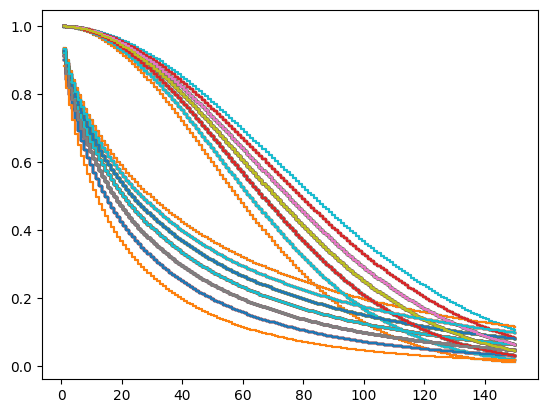

In [37]:
for i in range(400):
    plt.step(np.arange(1,151), sv1[i,0:150], where="mid")
    

In [33]:
import lifelines as ll

In [24]:
cph = ll.CoxPHFitter()
q = np.hstack([event_dict["t_event"].reshape(-1,1),event_dict["status"].reshape(-1,1),x_mat]) 
col = ["T", "E"] + [f"x_{i}" for i in range(x_mat.shape[1])] 
q = pd.DataFrame(q, columns=col)

cph.fit(q , "T", "E")
cph_sv = cph.predict_survival_function(x_mat).to_numpy().T

In [ ]:
# cph.pred

In [29]:
cph_sv

array([[9.98766597e-01, 9.98144805e-01, 9.95652763e-01, ...,
        6.79573903e-03, 3.51075304e-03, 1.28745041e-03],
       [9.99210826e-01, 9.98812850e-01, 9.97216925e-01, ...,
        4.10486702e-02, 2.69037071e-02, 1.41617735e-02],
       [9.98558102e-01, 9.97831317e-01, 9.94919246e-01, ...,
        2.92100917e-03, 1.34950534e-03, 4.17643711e-04],
       ...,
       [9.89416712e-01, 9.84119031e-01, 9.63137518e-01, ...,
        2.05016461e-19, 6.90211363e-22, 1.21084434e-25],
       [9.98913819e-01, 9.98366186e-01, 9.96170948e-01, ...,
        1.23346751e-02, 6.89521036e-03, 2.85041959e-03],
       [9.95054614e-01, 9.92568489e-01, 9.82651279e-01, ...,
        1.95914962e-09, 1.37988260e-10, 2.45330305e-12]])

In [25]:
cph.summary

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
x_0,-0.291488,0.747151,0.103279,-0.493912,-0.089065,0.610235,0.914786,0.0,-2.822336,4.767516e-03,7.712546
x_1,-0.232225,0.792768,0.102890,-0.433885,-0.030564,0.647987,0.969898,0.0,-2.257023,2.400661e-02,5.380424
x_2,-0.118714,0.888062,0.101477,-0.317606,0.080178,0.727889,1.083480,0.0,-1.169859,2.420578e-01,2.046576
x_3,-0.090602,0.913381,0.103358,-0.293180,0.111976,0.745888,1.118486,0.0,-0.876585,3.807120e-01,1.393228
x_4,-0.217785,0.804298,0.104527,-0.422654,-0.012917,0.655306,0.987166,0.0,-2.083542,3.720187e-02,4.748481
x_5,-0.220965,0.801744,0.103037,-0.422914,-0.019017,0.655135,0.981163,0.0,-2.144530,3.199043e-02,4.966216
x_6,-1.970912,0.139330,0.139681,-2.244681,-1.697142,0.105961,0.183206,0.0,-14.110101,3.291082e-45,147.768202
x_7,0.005307,1.005321,0.101873,-0.194360,0.204975,0.823361,1.227494,0.0,0.052098,9.584506e-01,0.061224
x_8,0.006422,1.006442,0.102422,-0.194321,0.207164,0.823394,1.230185,0.0,0.062698,9.500067e-01,0.073990


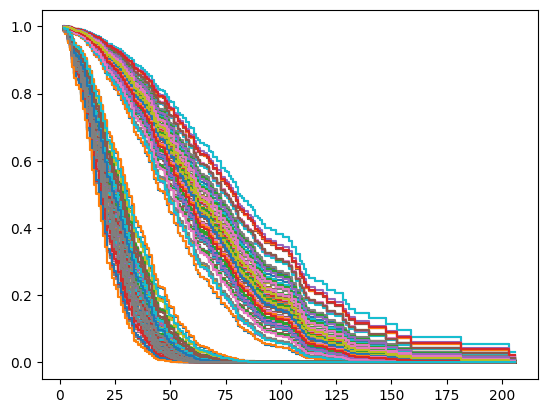

In [30]:
for i in range(400):
    plt.step(cph.timeline, cph_sv[i,:], where="mid")

In [132]:
msk = (event_dict["status"]==0).flatten()
sv = sv_true["sv_true"][msk,:]

np.unique(event_dict["t_event"])


array([  8.,  13.,  20.,  26.,  29.,  37.,  44.,  68.,  96., 124.])